In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("Train_Data.csv")
test = pd.read_csv("Test_Data.csv")

In [3]:
train.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [4]:
train.shape, test.shape

((3630, 7), (492, 6))

In [5]:
#As we can see that it is a very small dataset hence there is a chance of model overfitting

In [6]:
train.dtypes

age         float64
sex          object
bmi         float64
smoker       object
region       object
children      int64
charges     float64
dtype: object

#### There are 7 columns and out of which 3 are object dtype and rest are integer or float "charges" column is the dependent column. these categorical values needs to be converted into numerical value before feeding to the ML model.

In [7]:
train.isnull().sum(), test.isnull().sum()

(age         0
 sex         0
 bmi         0
 smoker      0
 region      0
 children    0
 charges     0
 dtype: int64,
 age         0
 sex         0
 bmi         0
 smoker      0
 region      0
 children    0
 dtype: int64)

In [8]:
#there are no null values in the dataset

## let us analyse first the categorical columns





In [9]:
train['sex'].value_counts()

male      2029
female    1601
Name: sex, dtype: int64

In [10]:
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns

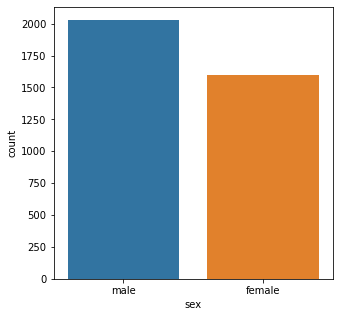

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(x="sex",data=train)

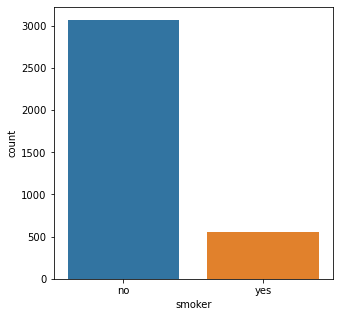

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(x="smoker", data=train)

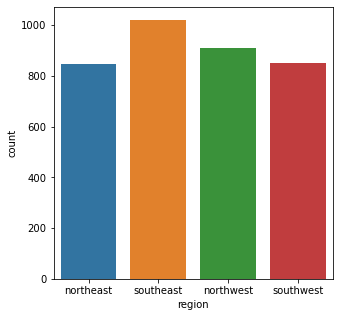

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(x="region", data=train)

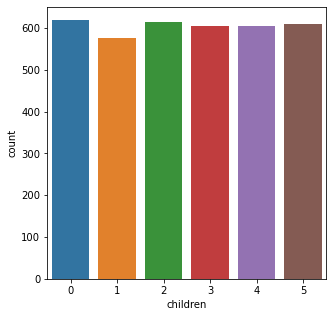

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(x="children", data=train)

# Analysing the numerical variables

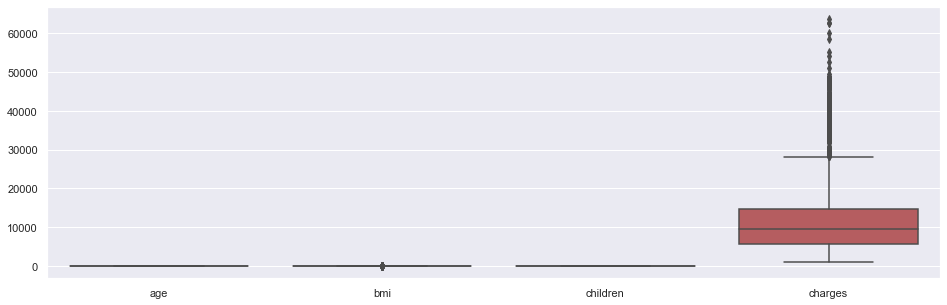

In [15]:
# Box plot for all the numerical variables
sns.set(rc={'figure.figsize': (16, 5)})
 
# multiple box plot illustration
sns.boxplot(data=train.select_dtypes(include='number'))

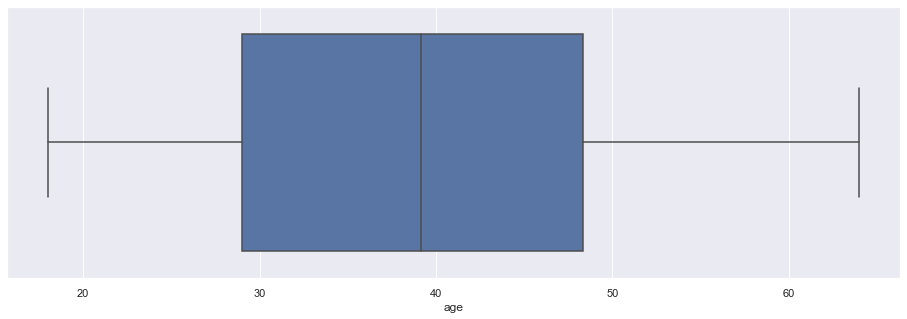

In [16]:
sns.boxplot(x='age',data=train)

In [17]:
import statistics
median_age = statistics.median(train.age)
median_age

39.170921965353635

In [18]:
train['age'].describe()

count    3630.000000
mean       38.887036
std        12.151029
min        18.000000
25%        29.000000
50%        39.170922
75%        48.343281
max        64.000000
Name: age, dtype: float64

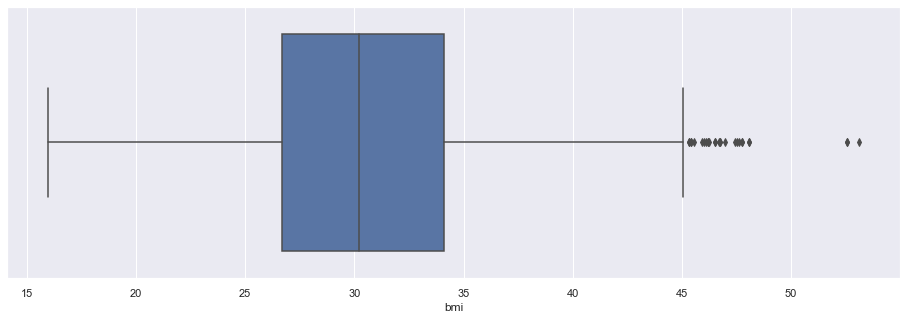

In [19]:
sns.boxplot(x='bmi',data=train)

In [20]:
median_bmi = statistics.median(train.bmi)
median_bmi

30.2

In [21]:
train['bmi'].describe()

count    3630.000000
mean       30.629652
std         5.441307
min        15.960000
25%        26.694526
50%        30.200000
75%        34.100000
max        53.130000
Name: bmi, dtype: float64

In [22]:
train[train['bmi']>40]

,age,sex,bmi,smoker,region,children,charges
32,24.000000,male,40.150000,yes,southeast,0,38126.246500
35,51.000000,male,42.900000,yes,southeast,2,47462.894000
41,47.000000,female,46.986496,no,southeast,1,8083.178229
80,63.000000,female,41.211696,no,northwest,3,15526.575181
115,30.000000,male,44.220000,no,southeast,2,4266.165800
...,...,...,...,...,...,...,...
3541,45.705270,male,40.642074,no,southeast,3,8936.308347
3546,48.000000,female,41.230000,no,northwest,4,11033.661700
3589,61.000000,male,43.400000,no,southwest,0,12574.049000
3625,48.820767,female,41.426984,no,northwest,4,10987.324964


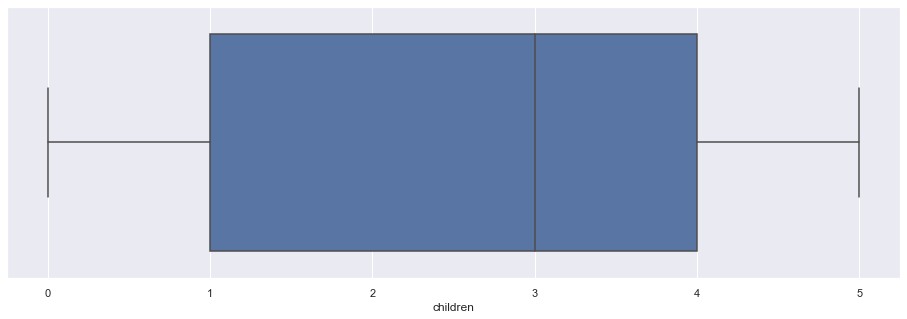

In [23]:
sns.boxplot(x='children',data=train)

In [24]:
train['children'].value_counts()

0    619
2    615
5    610
3    605
4    604
1    577
Name: children, dtype: int64

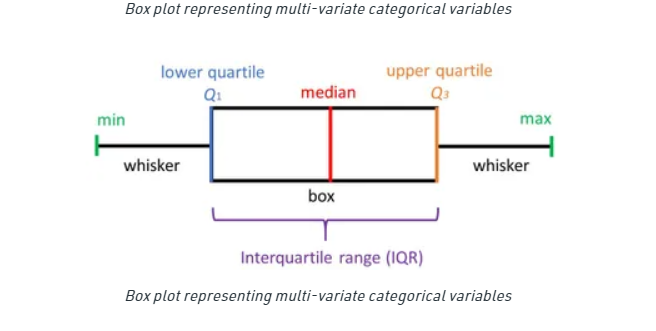

In [25]:
from IPython.display import Image
Image(filename='Capture.png')

In [26]:
median_children = statistics.median(train.children)
median_children

3.0

In [27]:
train['children'].describe()

count    3630.000000
mean        2.503581
std         1.712568
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: children, dtype: float64

### lets understand the bmi outliers which is above 40 

In [28]:
train_40 = train[train['bmi']>40]

In [29]:
train_40

,age,sex,bmi,smoker,region,children,charges
32,24.000000,male,40.150000,yes,southeast,0,38126.246500
35,51.000000,male,42.900000,yes,southeast,2,47462.894000
41,47.000000,female,46.986496,no,southeast,1,8083.178229
80,63.000000,female,41.211696,no,northwest,3,15526.575181
115,30.000000,male,44.220000,no,southeast,2,4266.165800
...,...,...,...,...,...,...,...
3541,45.705270,male,40.642074,no,southeast,3,8936.308347
3546,48.000000,female,41.230000,no,northwest,4,11033.661700
3589,61.000000,male,43.400000,no,southwest,0,12574.049000
3625,48.820767,female,41.426984,no,northwest,4,10987.324964


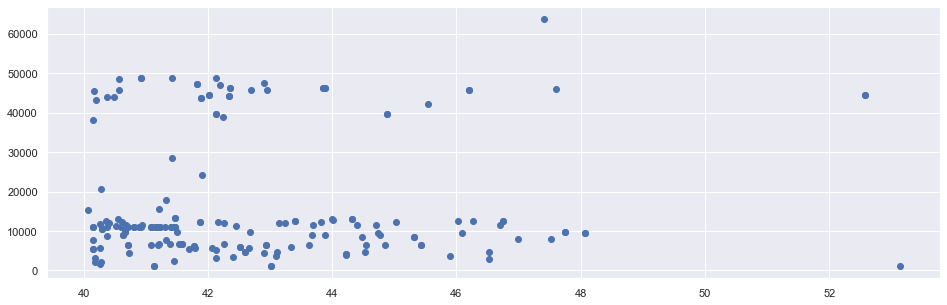

In [30]:
plt.scatter(train_40['bmi'], train_40['charges'])


In [31]:
train_40['charges'].describe()

count      186.000000
mean     17010.968054
std      15644.508956
min       1146.796600
25%       6419.648184
50%      11000.121255
75%      14780.151220
max      63770.428010
Name: charges, dtype: float64

In [32]:
train_less_40 =  train[train['bmi']<40]

In [33]:
train_less_40['charges'].describe()

count     3444.000000
mean     12556.566585
std      10370.663923
min       1121.873900
25%       5569.666209
50%       9361.125402
75%      14655.883815
max      62592.873090
Name: charges, dtype: float64

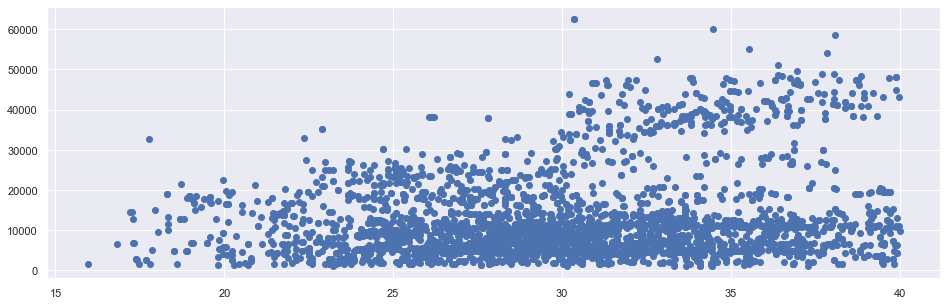

In [34]:
plt.scatter(train_less_40['bmi'], train_less_40['charges'])


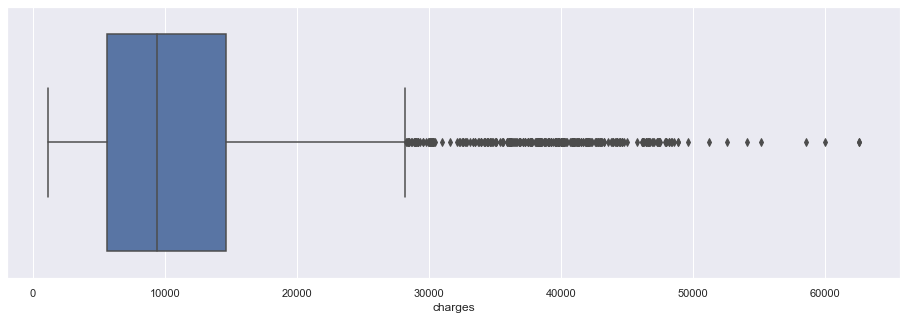

In [35]:
sns.boxplot(x='charges',data=train_less_40)

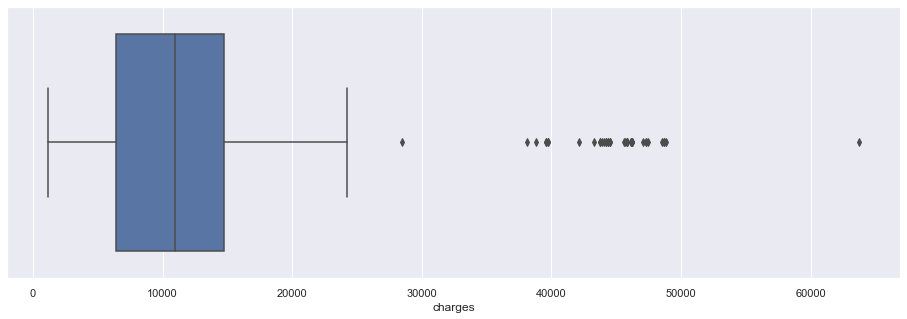

In [36]:
sns.boxplot(x='charges',data=train_40)

## bivariate analysis

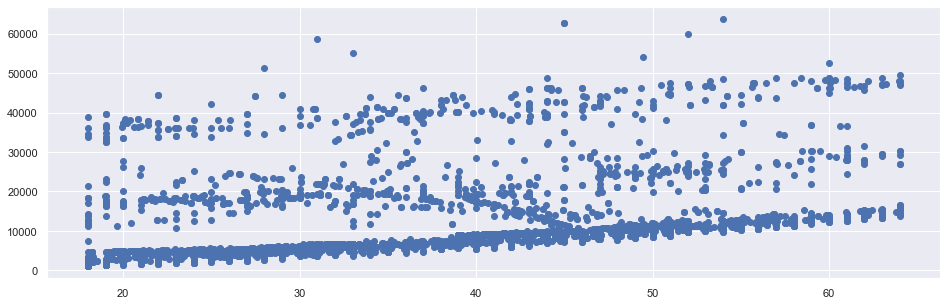

In [37]:
plt.scatter(train['age'], train['charges'])


### it is quite evident that 'age', 'bmi' has a significant impact on charges

In [38]:
#let us analyse the dependent variable
train['charges'].value_counts()

8342.908750     2
25154.172310    2
18629.514715    2
13143.864850    2
17009.334987    2
               ..
6393.603450     1
28954.275045    1
4916.953065     1
36898.733080    1
8217.400078     1
Name: charges, Length: 2951, dtype: int64

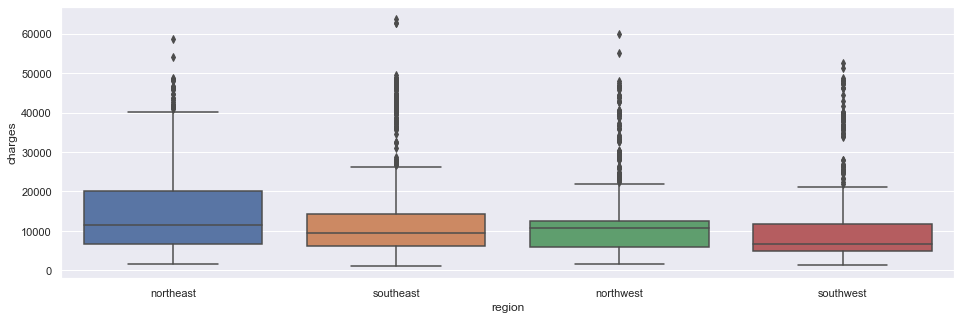

In [39]:
# box plot illutration
sns.boxplot(x='region', y='charges', data=train)

In [40]:
#northeast is an important region clearly the charges are high in this region

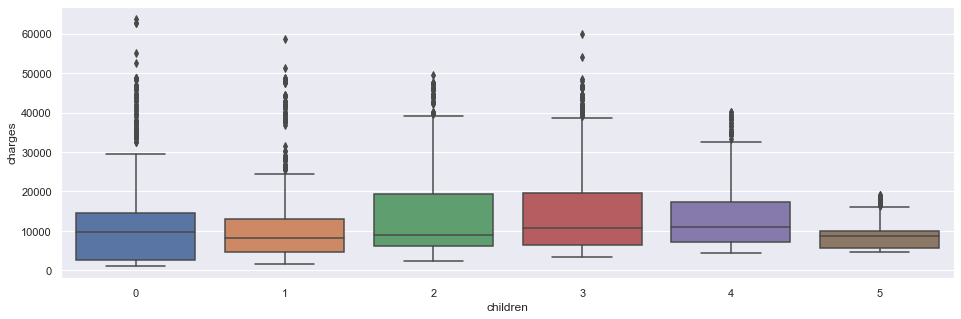

In [41]:
sns.boxplot(x='children', y='charges', data=train)

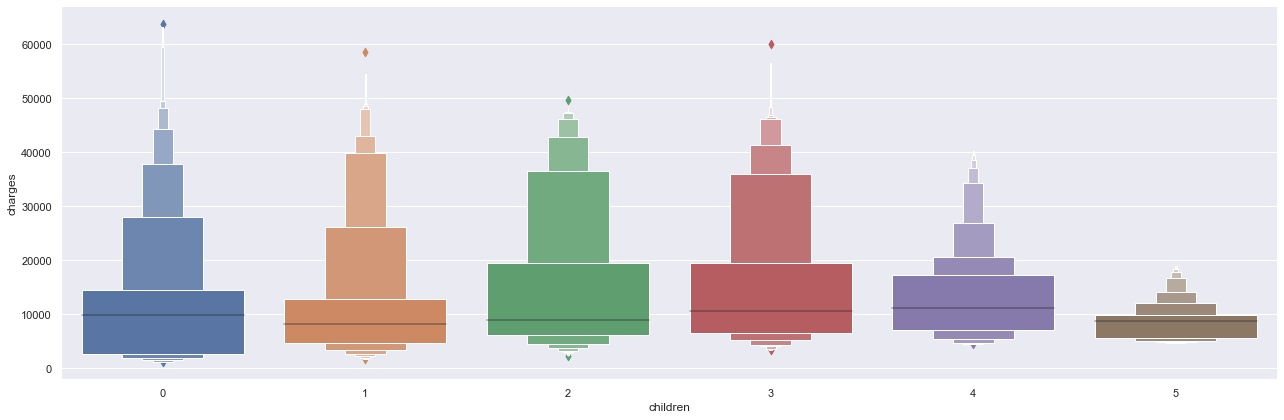

In [42]:
# charges vs children
sns.catplot(y = "charges", x = "children", data = train.sort_values("charges", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [43]:
#clearly the charges are low for persons who have more number of children

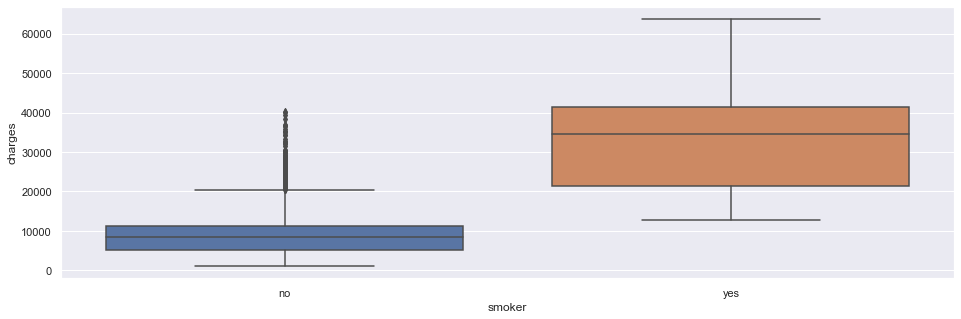

In [44]:
sns.boxplot(x='smoker', y='charges', data=train)

In [45]:
#charges are way high for smokers

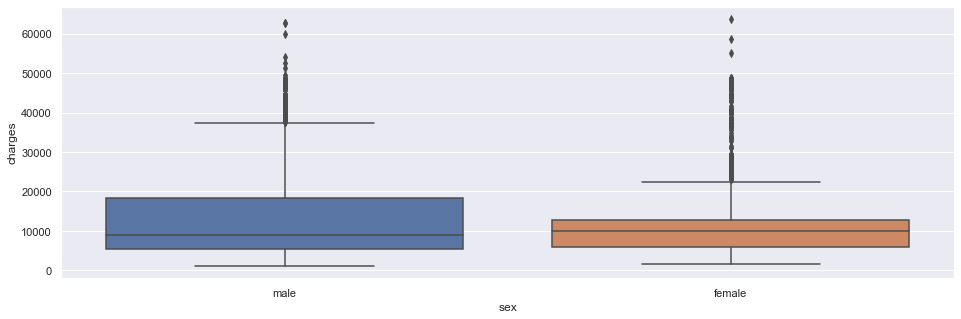

In [46]:
sns.boxplot(x='sex', y='charges', data=train)

In [47]:
train.columns

Index(['age', 'sex', 'bmi', 'smoker', 'region', 'children', 'charges'], dtype='object')

In [48]:
train = pd.get_dummies(train, columns=['sex','smoker','region'], drop_first = True)
test = pd.get_dummies(test, columns=['sex','smoker','region'], drop_first = True)

In [49]:
train.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,21.000000,25.745000,2,3279.868550,1,0,0,0,0
1,36.976978,25.744165,3,21454.494239,0,1,0,1,0
2,18.000000,30.030000,1,1720.353700,1,0,0,1,0
3,37.000000,30.676891,3,6801.437542,1,0,0,0,0
4,58.000000,32.010000,1,11946.625900,1,0,0,1,0


In [50]:
test.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,40.000000,29.900000,2,1,0,0,0,1
1,47.000000,32.300000,1,1,0,0,0,1
2,54.000000,28.880000,2,0,0,0,0,0
3,37.000000,30.568094,3,1,0,0,0,0
4,59.130049,33.132854,4,1,1,0,0,0


In [51]:
train.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [52]:
X = train.loc[:,['age', 'bmi', 'children','sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest']]

In [53]:
y = train['charges']

In [54]:
#sns.pairplot(X)
#plt.show()

In [55]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [56]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

In [57]:
# Building linear regression model
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [58]:
y_train_predict = lr_model.predict(X_train)

In [59]:
y_train_predict

array([12102.21639805, 10444.90778311, 10041.60229042, ...,
       32316.74220499,  2438.05856195, 14742.74588462])

In [60]:
y_train

174     11253.421000
1351    11003.692136
214      7371.772000
157     21190.720663
2167    18129.770564
            ...     
1130    46412.533236
1294     7954.517000
860     62592.873090
3507     4343.586409
3174     9875.680400
Name: charges, Length: 3267, dtype: float64

In [61]:
from sklearn.metrics import mean_squared_error, r2_score
#Rsquared=1-RSS/TSS
#Closer the Rsquare is towards 1 more it is better

In [62]:
# Evaluate prediction model using R2-Score
lr_r2 = r2_score(y_train, y_train_predict)
print('R2-Linear Regression : %.2f' % lr_r2)

R2-Linear Regression : 0.72


In [63]:
#clearly it is not a good r 2 score, model is underfitting

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [65]:
from sklearn import metrics


In [66]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

RMSE: 5723.11132963566


### not a good RMSE value let us train random forest

In [67]:
#biulding a random forest model

rf_model_1 = RandomForestRegressor()
rf_model_1.fit(X_train,y_train)

RandomForestRegressor()

In [68]:
rf_predict_train = rf_model_1.predict(X_train)

In [69]:
# Make prediction
rf_predict_1 = rf_model_1.predict(X_test)

In [70]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, rf_predict_train)))

RMSE: 1304.9839521807414


In [71]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_predict_1)))

RMSE: 3148.855185009428


In [72]:
rf_predict_1[:5]

array([11181.17307324,  6978.84995074,  2132.617919  , 14335.54156321,
       17803.1093583 ])

In [73]:
y_test

693     11023.443506
3220     6999.274662
432      1986.933400
183     12927.131694
2620    17500.205729
            ...     
755      9549.565100
501      4200.931630
2098     9858.025084
2526     5214.566006
1936    13846.962339
Name: charges, Length: 363, dtype: float64

In [74]:
# Evaluate prediction model using R2-Score
rf_r2 = r2_score(y_test, rf_predict_1)
print('R2-Random Forest : %.2f' % rf_r2)

R2-Random Forest : 0.90


In [75]:
#clearly a basic random forest has given a good score 

In [76]:
importance = rf_model_1.feature_importances_

In [77]:
importance

array([0.12105551, 0.18329245, 0.04373959, 0.0063076 , 0.60678013,
       0.00854175, 0.01498356, 0.01529941])

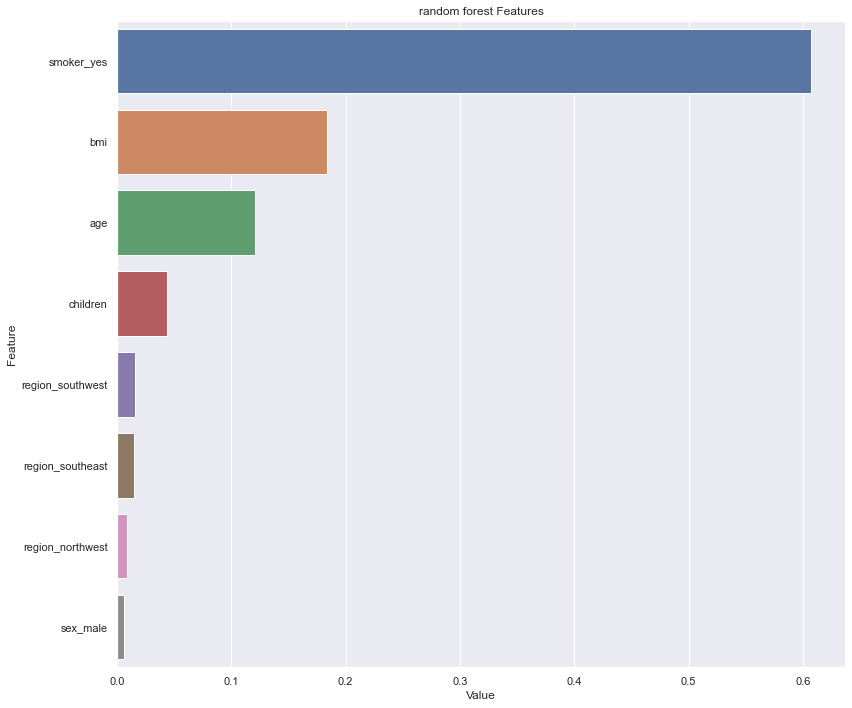

In [78]:
feature_imp = pd.DataFrame(sorted(zip(importance, X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('random forest Features')
plt.tight_layout()
plt.show()


In [79]:
feature_imp

,Value,Feature
0,0.606780,smoker_yes
1,0.183292,bmi
2,0.121056,age
3,0.043740,children
4,0.015299,region_southwest
5,0.014984,region_southeast
6,0.008542,region_northwest
7,0.006308,sex_male


In [80]:
#RF is best option here as there are less number of features and rows hence complexity is low

### to get the best parameter for the random forest model we will do some hyperparameter tuning

In [81]:
#let us look at the params currently in use

print('Parameters currently in use:\n')
print(rf_model_1.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


# hyperparameter we will be using

n_estimators = number of trees in the foreset
max_features = max number of features considered for splitting a node
max_depth = max number of levels in each decision tree
min_samples_split = min number of data points placed in a node before the node is split
min_samples_leaf = min number of data points allowed in a leaf node
bootstrap = method for sampling data points (with or without replacement)

In [82]:
#use randomised search cv, creating the paramter grid to sample 

from sklearn.model_selection import RandomizedSearchCV
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [83]:
#create a random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [84]:
from pprint import pprint


In [85]:
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [86]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_model_2 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,
                               cv = 3,verbose=2, random_state=42, n_jobs = -1 )

In [87]:
#fit the model

rf_model_2.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [88]:
rf_model_2.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [91]:
rf_predict_2_test = rf_model_2.predict(X_test)

In [92]:
# Evaluate prediction model using R2-Score
rf_r2_2 = r2_score(y_test, rf_predict_2_train)
print('R2-Random Forest : %.2f' % rf_r2_2)

R2-Random Forest : 0.91


In [93]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_predict_2_test)))

RMSE: 3019.619127057831


In [96]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    rmse = np.sqrt(metrics.mean_squared_error(test_labels, predictions))
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print(f'RMSE = {rmse}')
    return accuracy

In [97]:
base_accuracy = evaluate(rf_model_2, X_test, y_test)


Model Performance
Average Error: 1393.5370 degrees.
Accuracy = 85.27%.
RMSE = 3019.619127057831


In [98]:
base_accuracy = evaluate(rf_model_1, X_test, y_test)


Model Performance
Average Error: 1323.4672 degrees.
Accuracy = 86.54%.
RMSE = 3148.855185009428


## let us know make the prediction in the test set


In [99]:
test.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,40.000000,29.900000,2,1,0,0,0,1
1,47.000000,32.300000,1,1,0,0,0,1
2,54.000000,28.880000,2,0,0,0,0,0
3,37.000000,30.568094,3,1,0,0,0,0
4,59.130049,33.132854,4,1,1,0,0,0


In [100]:
test_pred = rf_model_2.predict(test)

In [106]:
#predicting for a single row
pred = rf_model_2.predict([[40,34,3,1,0,0,0,1]])

In [107]:
#a person who is of age 40, has bmi 34, with 3 children, male, does not smokes, and belongs to the southwest region
# will have medical charges close to 7863.
pred

array([7863.81878665])

In [101]:
test_pred

array([ 7895.99883746,  9850.28784135, 13527.8067237 ,  7020.70001678,
       39308.07184333,  8860.46901365, 11436.79877115,  8794.59122349,
        3199.94031714, 14727.72091258,  5660.21537666,  5507.15755889,
        7692.50692455,  5221.5950693 ,  8433.43589767,  7983.13528208,
       11809.01604369, 14064.02689523, 14733.12818862,  9454.63752324,
       11260.79788506, 12239.7536916 , 36847.15202585, 13260.46914131,
       10861.18410517, 11265.95993736, 21332.88843258, 12269.05613717,
        8914.21794864, 10804.95899806,  6483.55330718,  6100.25757413,
        4764.03882578, 12170.03509011,  3854.71432129,  6407.94082671,
       33880.84841636,  5057.72434673,  8993.98122045,  5127.40595411,
       23416.55349486,  6841.4211941 , 10399.66868453,  9645.39323547,
        6778.56428945,  7460.60169594, 11638.82569602,  6405.67407874,
       10360.5887531 , 38687.97615051,  9535.15030637,  5425.44694288,
       12914.34098377, 16713.8187388 , 14144.35851873, 10583.584664  ,
      

In [102]:
submission = pd.DataFrame({
        "prediction": test_pred,
        
    })
submission.to_csv('./newd.csv', index=False)
print(submission)

       prediction
0     7895.998837
1     9850.287841
2    13527.806724
3     7020.700017
4    39308.071843
..            ...
487  10572.901937
488   6741.997123
489  13498.742713
490   9276.672336
491  38209.679197

[492 rows x 1 columns]


#### We got a good score by just using Random Forest model, model also was less overfitting and was a generalised model

# Insights which can be explained to the stake holders 

-The accuracy is achieved is over 90% in both training and test also model is quite generalised and less overfitted to the data

-The three most important features in predicting the charges are :-smoker, bmi, and age
    
-We achieved a good model using just Random Forest and the hyperparameter was obtained using randomised search cv

-Medical Charges estimated for a person who is of age 40, has bmi 34, with 3 children, male, does not smokes, and belongs to the southwest region is 7863.82
